#1 随机数据的KMeans聚类算法

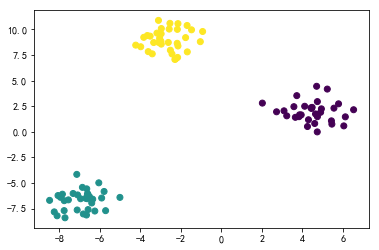

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
all(y == labels)

plt.scatter(X[:,0],X[:,1],c = labels)
plt.show()

#2 数据分布对KMeans聚类的影响

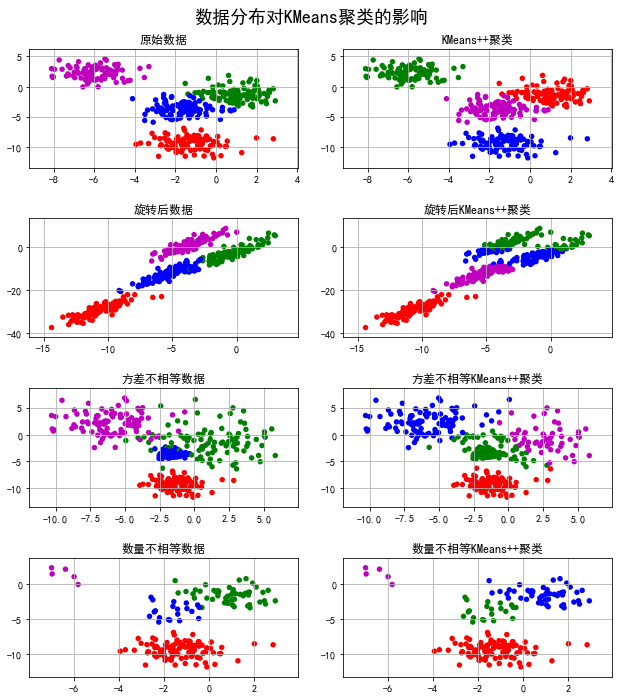

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

N = 400
centers = 4
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)
data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)

cls = KMeans(n_clusters=4, init='k-means++')
y_hat = cls.fit_predict(data)
y2_hat = cls.fit_predict(data2)
y3_hat = cls.fit_predict(data3)

m = np.array(((1, 1), (1, 3)))
data_r = data.dot(m)
y_r_hat = cls.fit_predict(data_r)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))

plt.figure(figsize=(9, 10), facecolor='w')
plt.subplot(421)
plt.title(u'原始数据')
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(422)
plt.title(u'KMeans++聚类')
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(423)
plt.title(u'旋转后数据')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(424)
plt.title(u'旋转后KMeans++聚类')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(425)
plt.title(u'方差不相等数据')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'方差不相等KMeans++聚类')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(427)
plt.title(u'数量不相等数据')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=y3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'数量不相等KMeans++聚类')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle(u'数据分布对KMeans聚类的影响', fontsize=18)
plt.show()

#3 利用KMeans对图像进行矢量化

原始数据：
 [[ 0.29411765  0.50588235  0.12941176]
 [ 0.30196078  0.51372549  0.1372549 ]
 [ 0.30588235  0.51764706  0.14117647]
 ..., 
 [ 0.09803922  0.35686275  0.01176471]
 [ 0.08627451  0.34117647  0.01176471]
 [ 0.07058824  0.3254902   0.        ]]


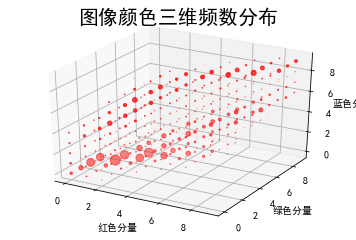

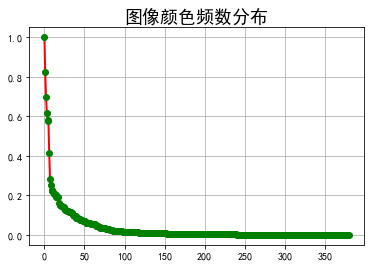

聚类结果：
 [ 0 35 35 ..., 50 50  3]
聚类中心：
 [[ 0.26023529  0.48423529  0.10964706]
 [ 0.66993464  0.66339869  0.75490196]
 [ 0.36431373  0.26823529  0.65019608]
 [ 0.07965686  0.3123366   0.00465686]
 [ 0.54068627  0.56446078  0.32303922]
 [ 0.88291317  0.81568627  0.64705882]
 [ 0.84347826  0.70485934  0.99079284]
 [ 0.23117647  0.09098039  0.52803922]
 [ 0.34726166  0.5913455   0.01162948]
 [ 0.69055258  0.61532977  0.45811052]
 [ 0.54248366  0.39267974  0.94013072]
 [ 0.1963161   0.46203209  0.00665478]
 [ 0.39901961  0.60588235  0.24607843]
 [ 0.0291939   0.18779956  0.00217865]
 [ 0.55294118  0.70931373  0.1122549 ]
 [ 0.65607843  0.8145098   0.45411765]
 [ 0.68529412  0.57745098  0.97647059]
 [ 0.90841984  0.75224913  0.99746251]
 [ 0.9719888   0.94677871  0.9837535 ]
 [ 0.37843137  0.23389356  0.76932773]
 [ 0.19607843  0.29542484  0.05098039]
 [ 0.39215686  0.42521008  0.23865546]
 [ 0.28415033  0.15980392  0.58267974]
 [ 0.44153298  0.62905526  0.03939394]
 [ 0.16952381  0.3859944 

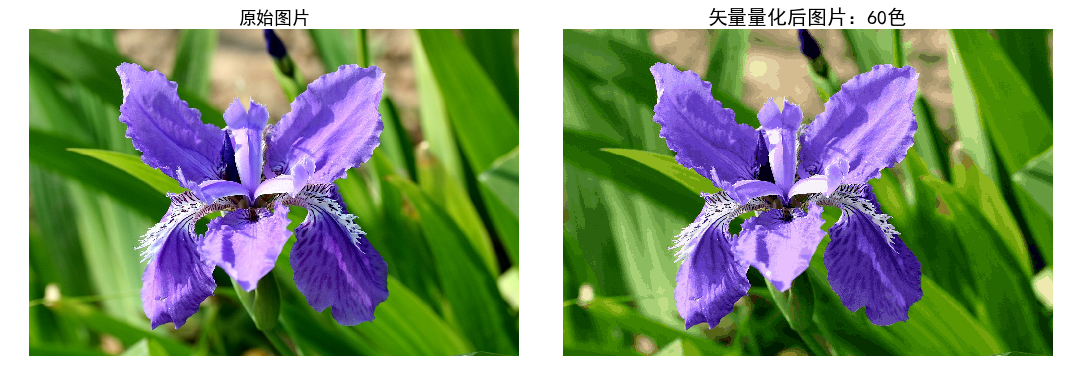

In [3]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image

def show_scatter(a):
    N = 10
    print('原始数据：\n', a)
    density, edges = np.histogramdd(a, bins=[N,N,N], range=[(0,1), (0,1), (0,1)])
    density /= density.max()
    x = y = z = np.arange(N)
    d = np.meshgrid(x, y, z)

    fig = plt.figure(1, facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(d[1], d[0], d[2], c='r', s=100*density, marker='o', depthshade=True)
    ax.set_xlabel(u'红色分量')
    ax.set_ylabel(u'绿色分量')
    ax.set_zlabel(u'蓝色分量')
    plt.title(u'图像颜色三维频数分布', fontsize=20)

    plt.figure(2, facecolor='w')
    den = density[density > 0]
    den = np.sort(den)[::-1]
    t = np.arange(len(den))
    plt.plot(t, den, 'r-', t, den, 'go', lw=2)
    plt.title(u'图像颜色频数分布', fontsize=18)
    plt.grid(True)
    plt.show()

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

num_vq = 60
im = Image.open('data/flower2.png')     # son.bmp(100)/flower2.png(200)/son.png(60)/lena.png(50)
image = np.array(im).astype(np.float) / 255
image = image[:, :, :3]
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)
show_scatter(image_v)

N = image_v.shape[0]    # 图像像素总数
# 选择足够多的样本(如1000个)，计算聚类中心
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]
model.fit(image_sample)
c = model.predict(image_v)  # 聚类结果
print('聚类结果：\n', c)
print('聚类中心：\n', model.cluster_centers_)

plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title(u'原始图片', fontsize=18)
plt.imshow(image)

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title(u'矢量量化后图片：%d色' % num_vq, fontsize=20)
plt.imshow(vq_image)

plt.tight_layout(1.2)
plt.show()